In [60]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\pai\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Bayan Ahmadi 991578889

In [61]:
import pandas as pd

# Load the dataset provided by the user
file_path = 'parkinsons_updrs.data'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [62]:
# Droped 'subject#' and 'motor_UPDRS' columns
data_cleaned = data.drop(columns=['subject#', 'motor_UPDRS'])

# Renamed 'total_UPDRS' to 'Target' for PyCaret setup
data_cleaned = data_cleaned.rename(columns={'total_UPDRS': 'Target'})

# Show the first few rows of the cleaned dataset
data_cleaned.head()


,age,sex,test_time,Target,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [63]:
from pycaret.regression import *

# Initialize PyCaret setup
regression_setup = setup(
    data=data_cleaned,
    target='Target',
    session_id=123  # Random seed for reproducibility
)

# Compare models to find the best one
print("Comparing models...")
best_model = compare_models()



,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Regression
3,Original data shape,"(5875, 20)"
4,Transformed data shape,"(5875, 20)"
5,Transformed train set shape,"(4112, 20)"
6,Transformed test set shape,"(1763, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


Comparing models...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.0431,3.4038,1.8350,0.9698,0.0993,0.0527,0.1130
rf,Random Forest Regressor,0.9970,3.9886,1.9824,0.9648,0.0970,0.0487,0.3920
lightgbm,Light Gradient Boosting Machine,1.4491,5.0506,2.2359,0.9552,0.1051,0.0660,0.1130
dt,Decision Tree Regressor,1.0338,11.6850,3.3838,0.8969,0.1444,0.0456,0.0140
gbr,Gradient Boosting Regressor,3.9124,25.0955,5.0040,0.7779,0.1993,0.1667,0.2250
knn,K Neighbors Regressor,6.1178,65.4495,8.0813,0.4211,0.3002,0.2556,0.0140
ada,AdaBoost Regressor,7.2592,69.5362,8.3363,0.3833,0.3230,0.3186,0.0830
lr,Linear Regression,8.0521,94.6144,9.7232,0.1619,0.3638,0.3517,0.2590
br,Bayesian Ridge,8.0592,95.2238,9.7525,0.1572,0.3644,0.3522,0.0060
ridge,Ridge Regression,8.0623,95.5028,9.7668,0.1547,0.3651,0.3529,0.0070


In [64]:
# Display the best model
print("\nBest Model Identified from Comparison:")
print(best_model)


Best Model Identified from Comparison:
ExtraTreesRegressor(n_jobs=-1, random_state=123)


In [65]:
# Finalize the best model (Extra Trees Regressor)
print("\nFinalizing the Best Model (Extra Trees Regressor)...")
final_et_model = finalize_model(best_model)


Finalizing the Best Model (Extra Trees Regressor)...



Evaluating the Finalized Best Model...


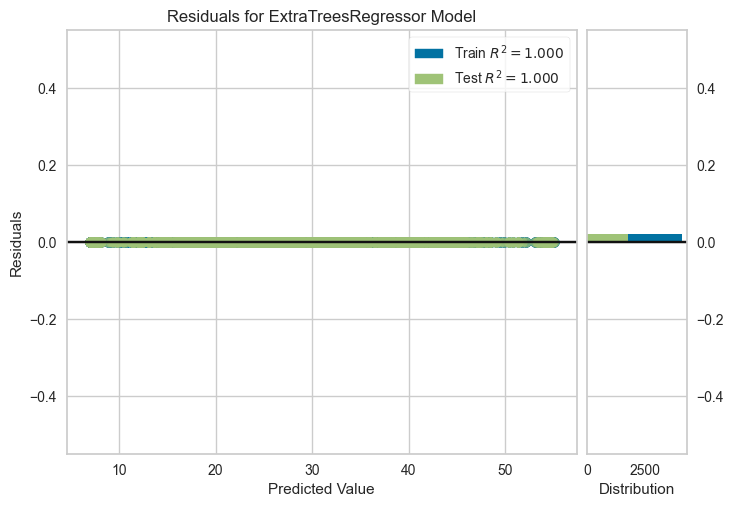

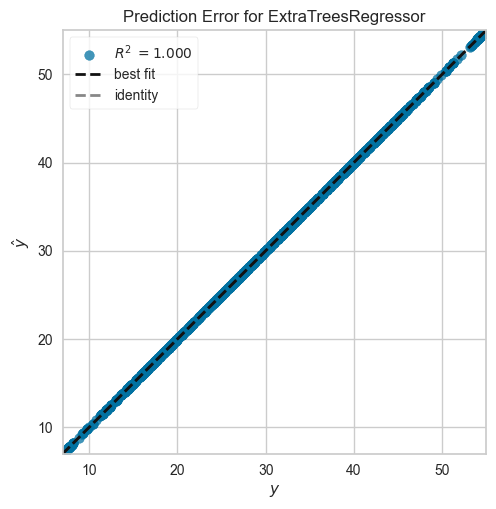

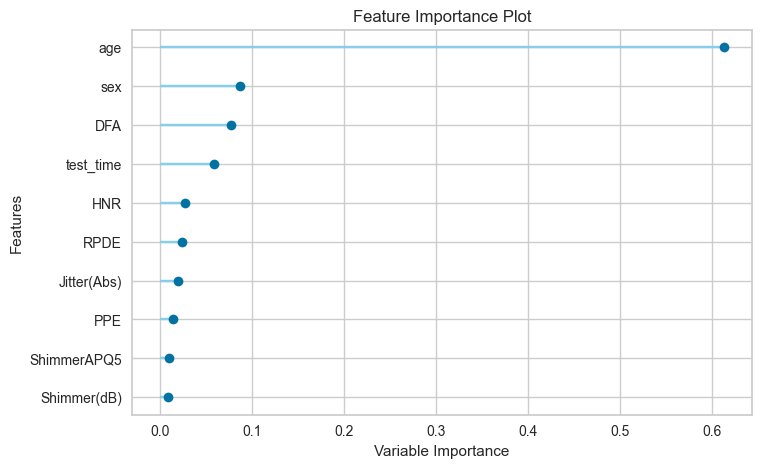

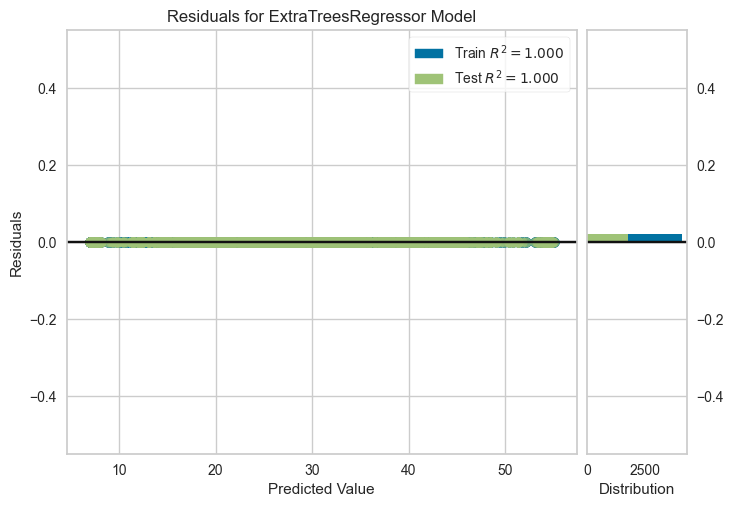

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


In [66]:
# Evaluate the finalized best model (Extra Trees Regressor)
print("\nEvaluating the Finalized Best Model...")
plot_model(final_et_model, plot='residuals')  # Residuals plot
plot_model(final_et_model, plot='error')  # Error plot
plot_model(final_et_model, plot='feature')  # Feature importance
# plot residuals
plot_model(final_et_model, plot = 'residuals')
et_predictions = predict_model(final_et_model)

In [67]:
# predict on test set
holdout_pred = predict_model(final_et_model)
# show predictions df
holdout_pred.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,Target,prediction_label
2661,55,0,117.779999,0.00506,0.000034,0.00164,0.00223,0.00493,0.01881,0.188,...,0.01064,0.01410,0.02659,0.011061,25.356001,0.44055,0.67158,0.18952,26.663000,26.663000
1172,73,1,183.699997,0.00259,0.000011,0.00111,0.00104,0.00333,0.01376,0.129,...,0.00718,0.01277,0.01664,0.007869,26.225000,0.40624,0.60236,0.12222,29.031000,29.031000
1877,58,1,175.389999,0.00358,0.000020,0.00161,0.00168,0.00482,0.02201,0.201,...,0.01337,0.01787,0.03365,0.010896,22.733999,0.42592,0.57892,0.14130,25.417999,25.417999
547,74,0,142.699997,0.00484,0.000039,0.00207,0.00218,0.00622,0.03640,0.373,...,0.01909,0.02824,0.05911,0.017947,21.205000,0.62605,0.60507,0.14467,27.139000,27.139000
5068,56,1,105.790001,0.00545,0.000027,0.00320,0.00296,0.00961,0.02196,0.192,...,0.01341,0.01518,0.03755,0.015528,21.239000,0.36154,0.61082,0.11911,43.201000,43.201000


In [68]:
# Save the finalized Extra Trees Regressor model
save_model(final_et_model, 'final_extratrees_model')
print("\nExtra Trees Regressor Model Saved as 'final_extratrees_model.pkl'.")

Transformation Pipeline and Model Successfully Saved

Extra Trees Regressor Model Saved as 'final_extratrees_model.pkl'.


In [69]:
# Train and Evaluate Random Forest Regressor just to see the difference 
print("\nTraining and Finalizing Random Forest Regressor...")
rf_model = create_model('rf')  # Train Random Forest Regressor
final_rf_model = finalize_model(rf_model)  # Finalize Random Forest Regressor



Training and Finalizing Random Forest Regressor...


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0847,3.9563,1.9890,0.9647,0.1033,0.0542
1,0.9618,3.5475,1.8835,0.9646,0.0867,0.0456
2,0.8159,2.4144,1.5538,0.9776,0.0903,0.0423
3,0.9970,4.6587,2.1584,0.9604,0.0885,0.0440
4,0.9526,3.1379,1.7714,0.9739,0.0793,0.0414
5,1.0600,5.1690,2.2735,0.9594,0.1238,0.0610
6,1.0468,5.5258,2.3507,0.9516,0.1085,0.0490
7,1.0040,3.6201,1.9027,0.9658,0.0933,0.0485
8,0.9927,3.0976,1.7600,0.9732,0.0869,0.0449



Evaluating Random Forest Regressor...


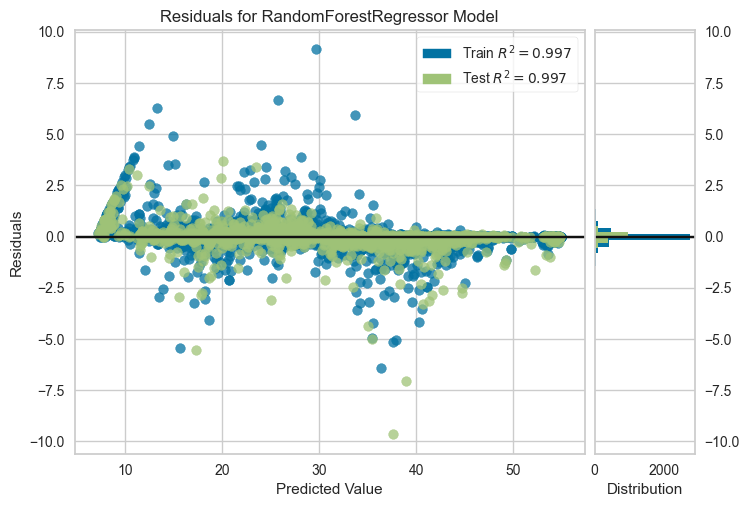

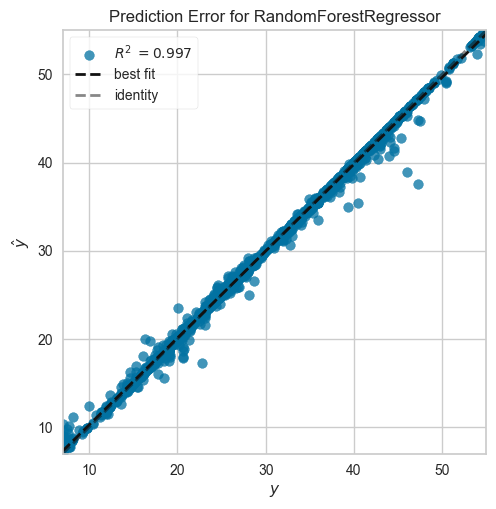

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.2445,0.3556,0.5963,0.9970,0.0301,0.0120


In [70]:
# Evaluate the Random Forest Regressor model
print("\nEvaluating Random Forest Regressor...")
plot_model(final_rf_model, plot='residuals')  # Residuals plot
plot_model(final_rf_model, plot='error')  # Error plot
rf_predictions = predict_model(final_rf_model)

In [71]:
# Save the finalized Random Forest Regressor model
save_model(final_rf_model, 'final_randomforest_model')
print("\nRandom Forest Regressor Model Saved as 'final_randomforest_model.pkl'.")

Transformation Pipeline and Model Successfully Saved

Random Forest Regressor Model Saved as 'final_randomforest_model.pkl'.


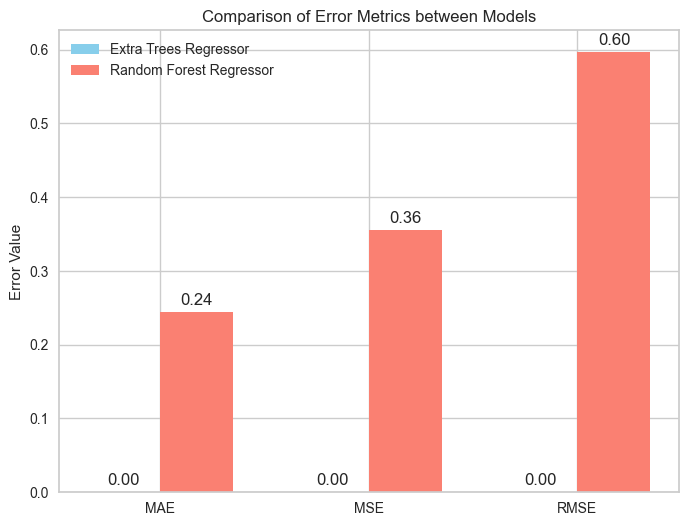

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Error metrics for each model
metrics = ['MAE', 'MSE', 'RMSE']
et_errors = [et_mae, et_mse, et_rmse]
rf_errors = [rf_mae, rf_mse, rf_rmse]

x = np.arange(len(metrics))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, et_errors, width, label='Extra Trees Regressor', color='skyblue')
rects2 = ax.bar(x + width/2, rf_errors, width, label='Random Forest Regressor', color='salmon')

# Add labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Error Value')
ax.set_title('Comparison of Error Metrics between Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Attach a text label above each bar displaying its height
def autolabel(rects):
    """Attach a text label above each bar displaying its value rounded to two decimals"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text by 3 points above bar
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()



In [73]:
# You can visually see the comparison of error betweeen the best model (Extra Tree Regreesion model) to the second best (Random Forest Regression Model)** 